In [ ]:

import kagglehub
andrewmvd_ocular_disease_recognition_odir5k_path = kagglehub.dataset_download('andrewmvd/ocular-disease-recognition-odir5k')

print('Data source import complete.')


100%|██████████| 1.62G/1.62G [00:28<00:00, 60.1MB/s]

Extracting files...


Data source import complete.


# * Ocular Disease*
# 1. Introduction to the Ocular Disease Intelligent Recognition (ODIR) :
* * The Ocular Disease Intelligent Recognition (ODIR) dataset is a comprehensive ophthalmic dataset designed to facilitate the study and analysis of various ocular diseases. It comprises data from 5,000 patients collected by Shanggong Medical Technology Co., Ltd. from multiple hospitals and medical centers across China. The dataset is structured to include both demographic and diagnostic information, captured through color fundus photographs of the left and right eyes, as well as diagnostic keywords provided by medical professionals.

![image.png](attachment:fa4eab82-4f3e-418f-a2c2-e8a9b42a7fd6.png)![image.png]


# 2. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
ocular_disease = pd.read_csv('/content/full_df.csv')
ocular_disease.head()
import warnings
warnings.filterwarnings('ignore')


# Dataset Components:

* Patient Information: Each entry in the dataset includes the patient's age and sex, which are crucial for understanding the prevalence and impact of ocular diseases across different demographics.

* Fundus Images: The dataset contains high-resolution images of the left and right eye fundi, captured using various cameras (e.g., Canon, Zeiss, Kowa). These images provide visual evidence of the state of the eye and are essential for training and testing image recognition algorithms.

* Diagnostic Keywords: For each eye, diagnostic keywords are provided, indicating the presence of specific ocular conditions. These keywords are essential for understanding the nature and extent of diseases.

* Disease Labels: The dataset includes indicators for eight specific ocular conditions:

* * Normal (N)
* * Diabetes (D)
* * Glaucoma (G)
* * Cataract (C)
* * Age-related Macular Degeneration (A)
* * Hypertension (H)
* * Pathological Myopia (M)
* * Other diseases/abnormalities (O)

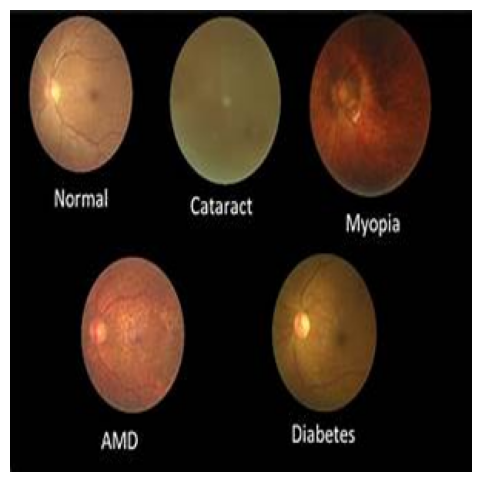

In [ ]:
# Download the image which clarify { Normal (N) , Diabetes (D) , Cataract (C) , Pathological Myopia (M) }
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


img_url = 'https://tse4.mm.bing.net/th?id=OIP.eJkxQydzEg-yfxAVksJDJwHaE5&pid=Api&P=0&h=220'


response = requests.get(img_url)
img = Image.open(BytesIO(response.content))


new_size = (300, 300)
resized_img = img.resize(new_size)

plt.figure(figsize=(6, 6))
plt.imshow(resized_img)
plt.axis('off')
plt.show()



In [ ]:
ocular_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [ ]:
ocular_disease.shape

(6392, 19)

In [ ]:
ocular_disease.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [ ]:
ocular_disease.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


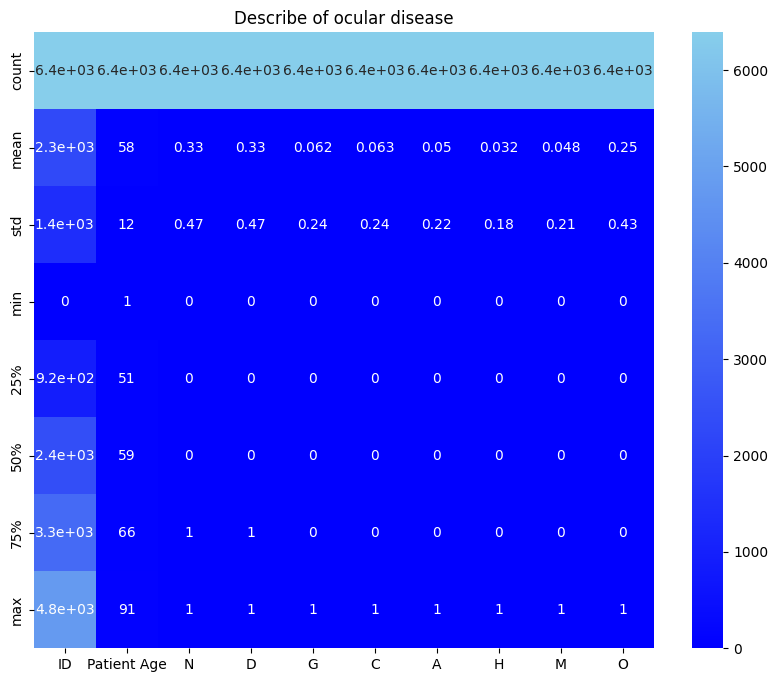

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list('gradient_skyblue', ['blue', 'skyblue'])
plt.figure(figsize=(10,8))
sns.heatmap(ocular_disease.describe() , cmap=cmap , annot=True)
plt.title('Describe of ocular disease')
plt.show()

In [ ]:
# know count of patient > 40 age
disease_grt40 =  ocular_disease['Patient Age']>40
disease_grt40_count = disease_grt40.value_counts()
disease_grt40_count

,count
Patient Age,
True,5977
False,415


In [ ]:
ocular_disease['Patient Sex'].value_counts()

,count
Patient Sex,
Male,3424
Female,2968


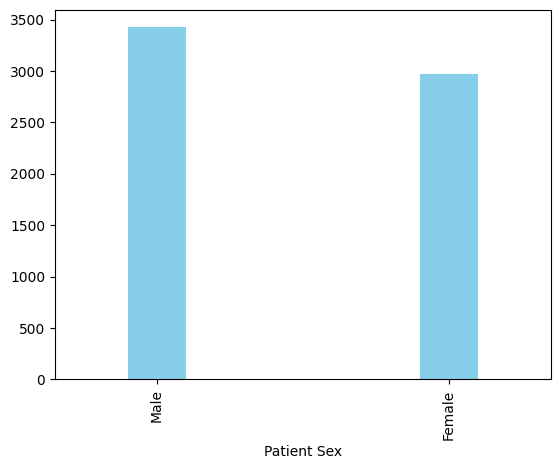

In [ ]:
ocular_disease['Patient Sex'].value_counts().plot(kind='bar' , color='skyblue' , width=0.2 )
plt.show()

In [ ]:
ocular_disease.index

RangeIndex(start=0, stop=6392, step=1)

# 3. Data Cleaning

In [ ]:
ocular_disease.isna().sum()

,0
ID,0
Patient Age,0
Patient Sex,0
Left-Fundus,0
Right-Fundus,0
Left-Diagnostic Keywords,0
Right-Diagnostic Keywords,0
N,0
D,0
G,0


In [ ]:
ocular_disease.duplicated().sum()

0

In [ ]:
ocular_disease.dtypes

,0
ID,int64
Patient Age,int64
Patient Sex,object
Left-Fundus,object
Right-Fundus,object
Left-Diagnostic Keywords,object
Right-Diagnostic Keywords,object
N,int64
D,int64
G,int64


In [ ]:
ocular_disease['Patient Sex']=ocular_disease['Patient Sex'].astype('category')
ocular_disease['target']=ocular_disease['target'].astype('category')

In [ ]:
print(ocular_disease.dtypes)

ID                              int64
Patient Age                     int64
Patient Sex                  category
Left-Fundus                    object
Right-Fundus                   object
Left-Diagnostic Keywords       object
Right-Diagnostic Keywords      object
N                               int64
D                               int64
G                               int64
C                               int64
A                               int64
H                               int64
M                               int64
O                               int64
filepath                       object
labels                         object
target                       category
filename                       object
dtype: object


In [ ]:
ocular_disease.head(1)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg


In [ ]:
ocular_disease.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

# 4. Data analysis & visualization

In [ ]:
ocular_disease['Patient Age'].value_counts()

,count
Patient Age,
56,294
60,285
54,277
62,265
65,252
...,...
15,2
19,2
14,2


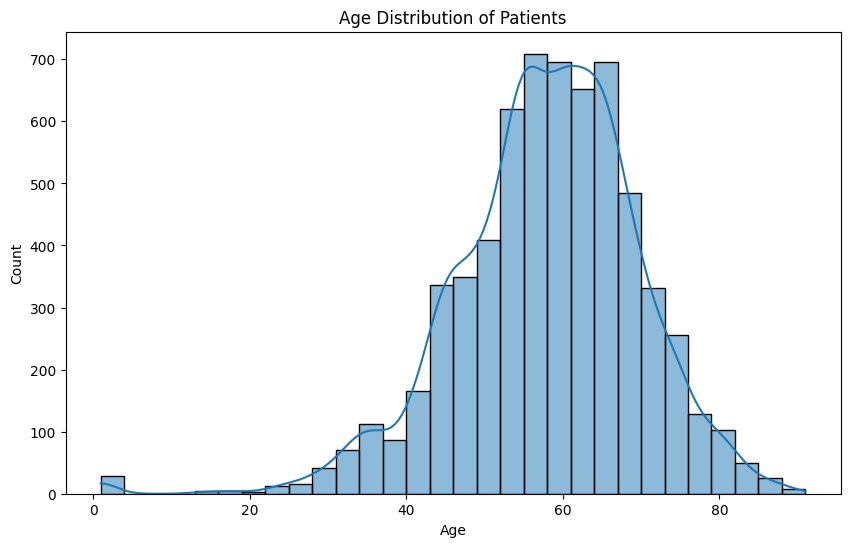

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(ocular_disease['Patient Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
ocular_disease['Patient Sex'].value_counts()

,count
Patient Sex,
Male,3424
Female,2968


In [ ]:
ocular_disease['Patient Sex'].describe()

,Patient Sex
count,6392
unique,2
top,Male
freq,3424


In [ ]:
ocular_disease['Patient Sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6392 entries, 0 to 6391
Series name: Patient Sex
Non-Null Count  Dtype   
--------------  -----   
6392 non-null   category
dtypes: category(1)
memory usage: 6.5 KB


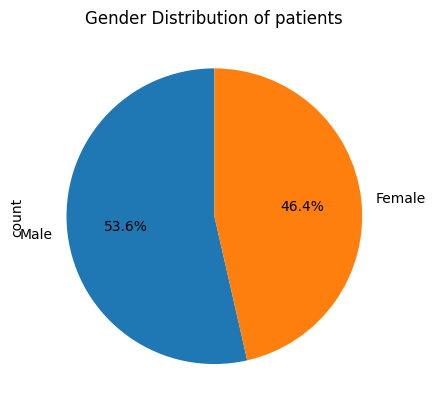

In [ ]:
ocular_disease['Patient Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, color=['lightblue' , 'skyblue' ])
plt.title('Gender Distribution of patients')
plt.show()

In [ ]:
ocular_disease[['N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O']].value_counts()

N  D  G  C  A  H  M  O
1  0  0  0  0  0  0  0    2101
0  1  0  0  0  0  0  0    1376
   0  0  0  0  0  0  1     894
   1  0  0  0  0  0  1     464
   0  0  1  0  0  0  0     276
         0  1  0  0  0     234
      1  0  0  0  0  0     232
      0  0  0  0  1  0     206
   1  0  0  0  1  0  0      88
   0  0  0  0  1  0  0      72
   1  0  1  0  0  0  0      62
   0  1  0  0  0  0  1      57
      0  0  0  0  1  1      51
   1  1  0  0  0  0  0      42
   0  0  1  0  0  0  1      42
   1  0  0  1  0  0  0      28
            0  0  1  0      26
   0  0  0  1  0  0  1      23
      1  0  1  0  0  0      19
      0  0  0  1  0  1      15
   1  1  0  0  0  0  1      12
      0  1  0  0  0  1      12
   0  1  0  0  1  0  0      10
               0  1  0      10
      0  0  1  1  0  0       8
   1  0  0  0  0  1  1       6
   0  1  0  0  1  0  1       5
      0  1  0  1  0  0       4
      1  1  0  0  0  0       4
   1  0  0  1  0  0  1       2
                  1  0       2
   0  0  0  1  0  1  0       2
      1  1  0  0  0  1       2
   1  1  0  0  0  1  0       2
      0  0  0  1  0  1       1
   0  1  0  0  0  1  1       1
            1  0  0  1       1
Name: count, dtype: int64

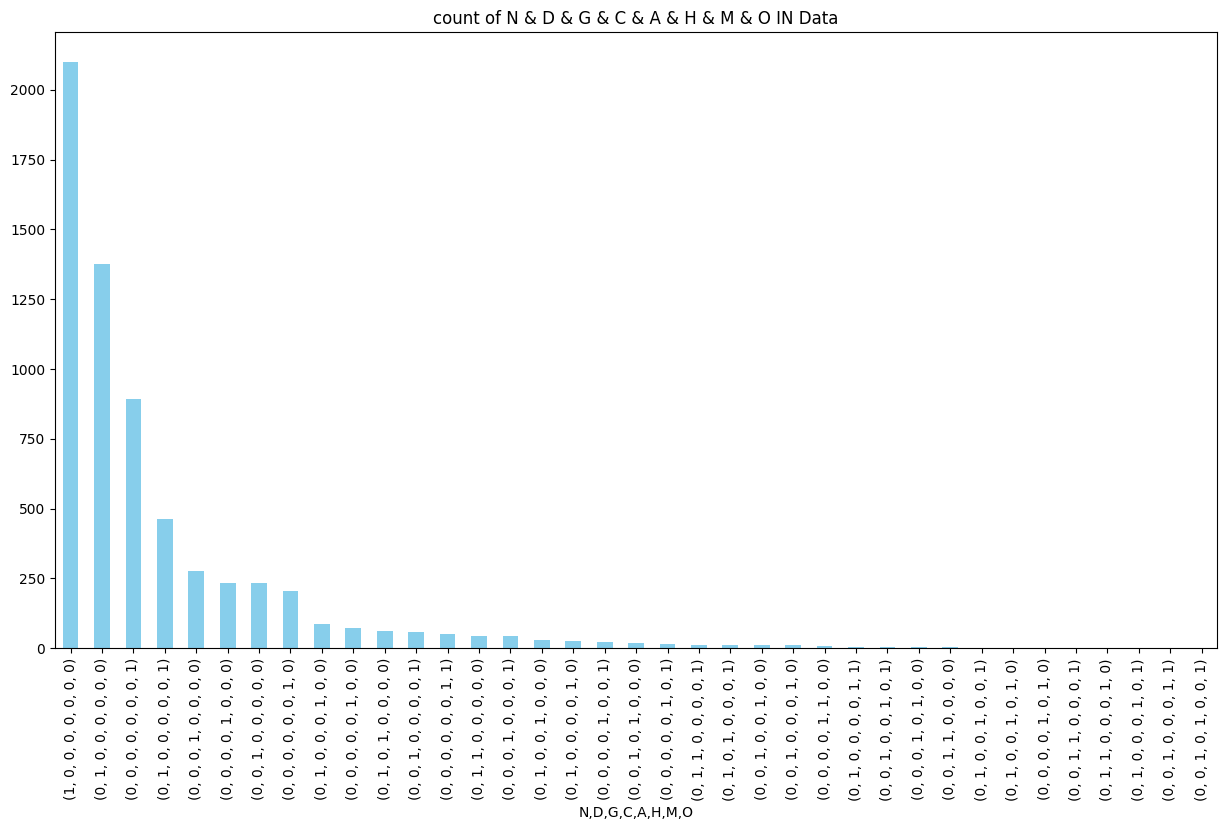

In [ ]:
plt.figure(figsize=(15,8))
ocular_disease[['N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O']].value_counts().plot(kind='bar', color='skyblue')
plt.title('count of N & D & G & C & A & H & M & O IN Data')
plt.show()

In [ ]:
age_Normal_counts = ocular_disease.groupby('Patient Age')['N'].sum()
age_Normal_counts

,N
Patient Age,
1,0
14,2
15,2
17,0
18,0
...,...
86,2
87,4
88,2


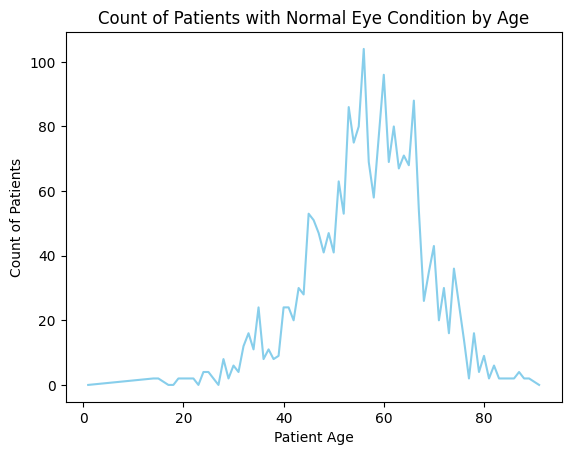

In [ ]:
age_Normal_counts.plot(kind='line' , color='skyblue')
plt.title('Count of Patients with Normal Eye Condition by Age')
plt.xlabel('Patient Age')
plt.ylabel('Count of Patients')
plt.show()

In [ ]:
age_disease_counts = ocular_disease.groupby('Patient Age')[['N','D', 'G',
       'C', 'A', 'H', 'M']].sum()
age_disease_counts

,N,D,G,C,A,H,M
Patient Age,,,,,,,
1,0,0,0,0,2,0,25
14,2,0,0,0,0,0,0
15,2,0,0,0,0,0,0
17,0,2,0,0,0,0,0
18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...
86,2,0,0,0,0,0,0
87,4,0,0,6,2,0,1
88,2,0,0,0,0,0,0


In [ ]:
Sex_disease_counts = ocular_disease.groupby('Patient Sex')[['N','D', 'G',
       'C', 'A', 'H', 'M']].sum()
Sex_disease_counts

,N,D,G,C,A,H,M
Patient Sex,,,,,,,
Female,927,940,167,234,146,76,198
Male,1174,1183,230,168,173,127,108


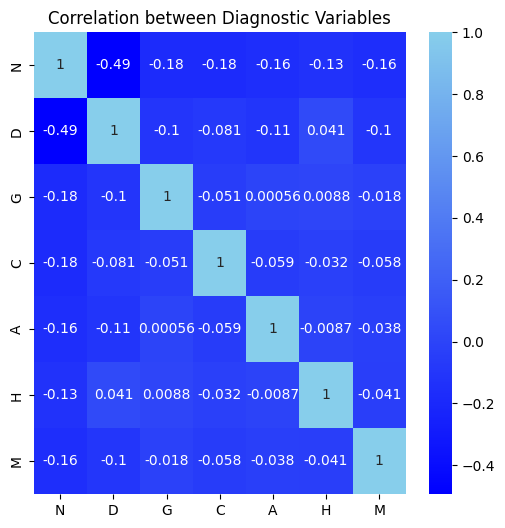

In [ ]:

plt.figure(figsize=(6,6))
cmap = mcolors.LinearSegmentedColormap.from_list('gradient_skyblue', ['blue', 'skyblue'])
sns.heatmap(ocular_disease[['N','D', 'G',
       'C', 'A', 'H', 'M']].corr(),annot=True,cmap=cmap)
plt.title('Correlation between Diagnostic Variables')
plt.show()

<Figure size 500x500 with 0 Axes>

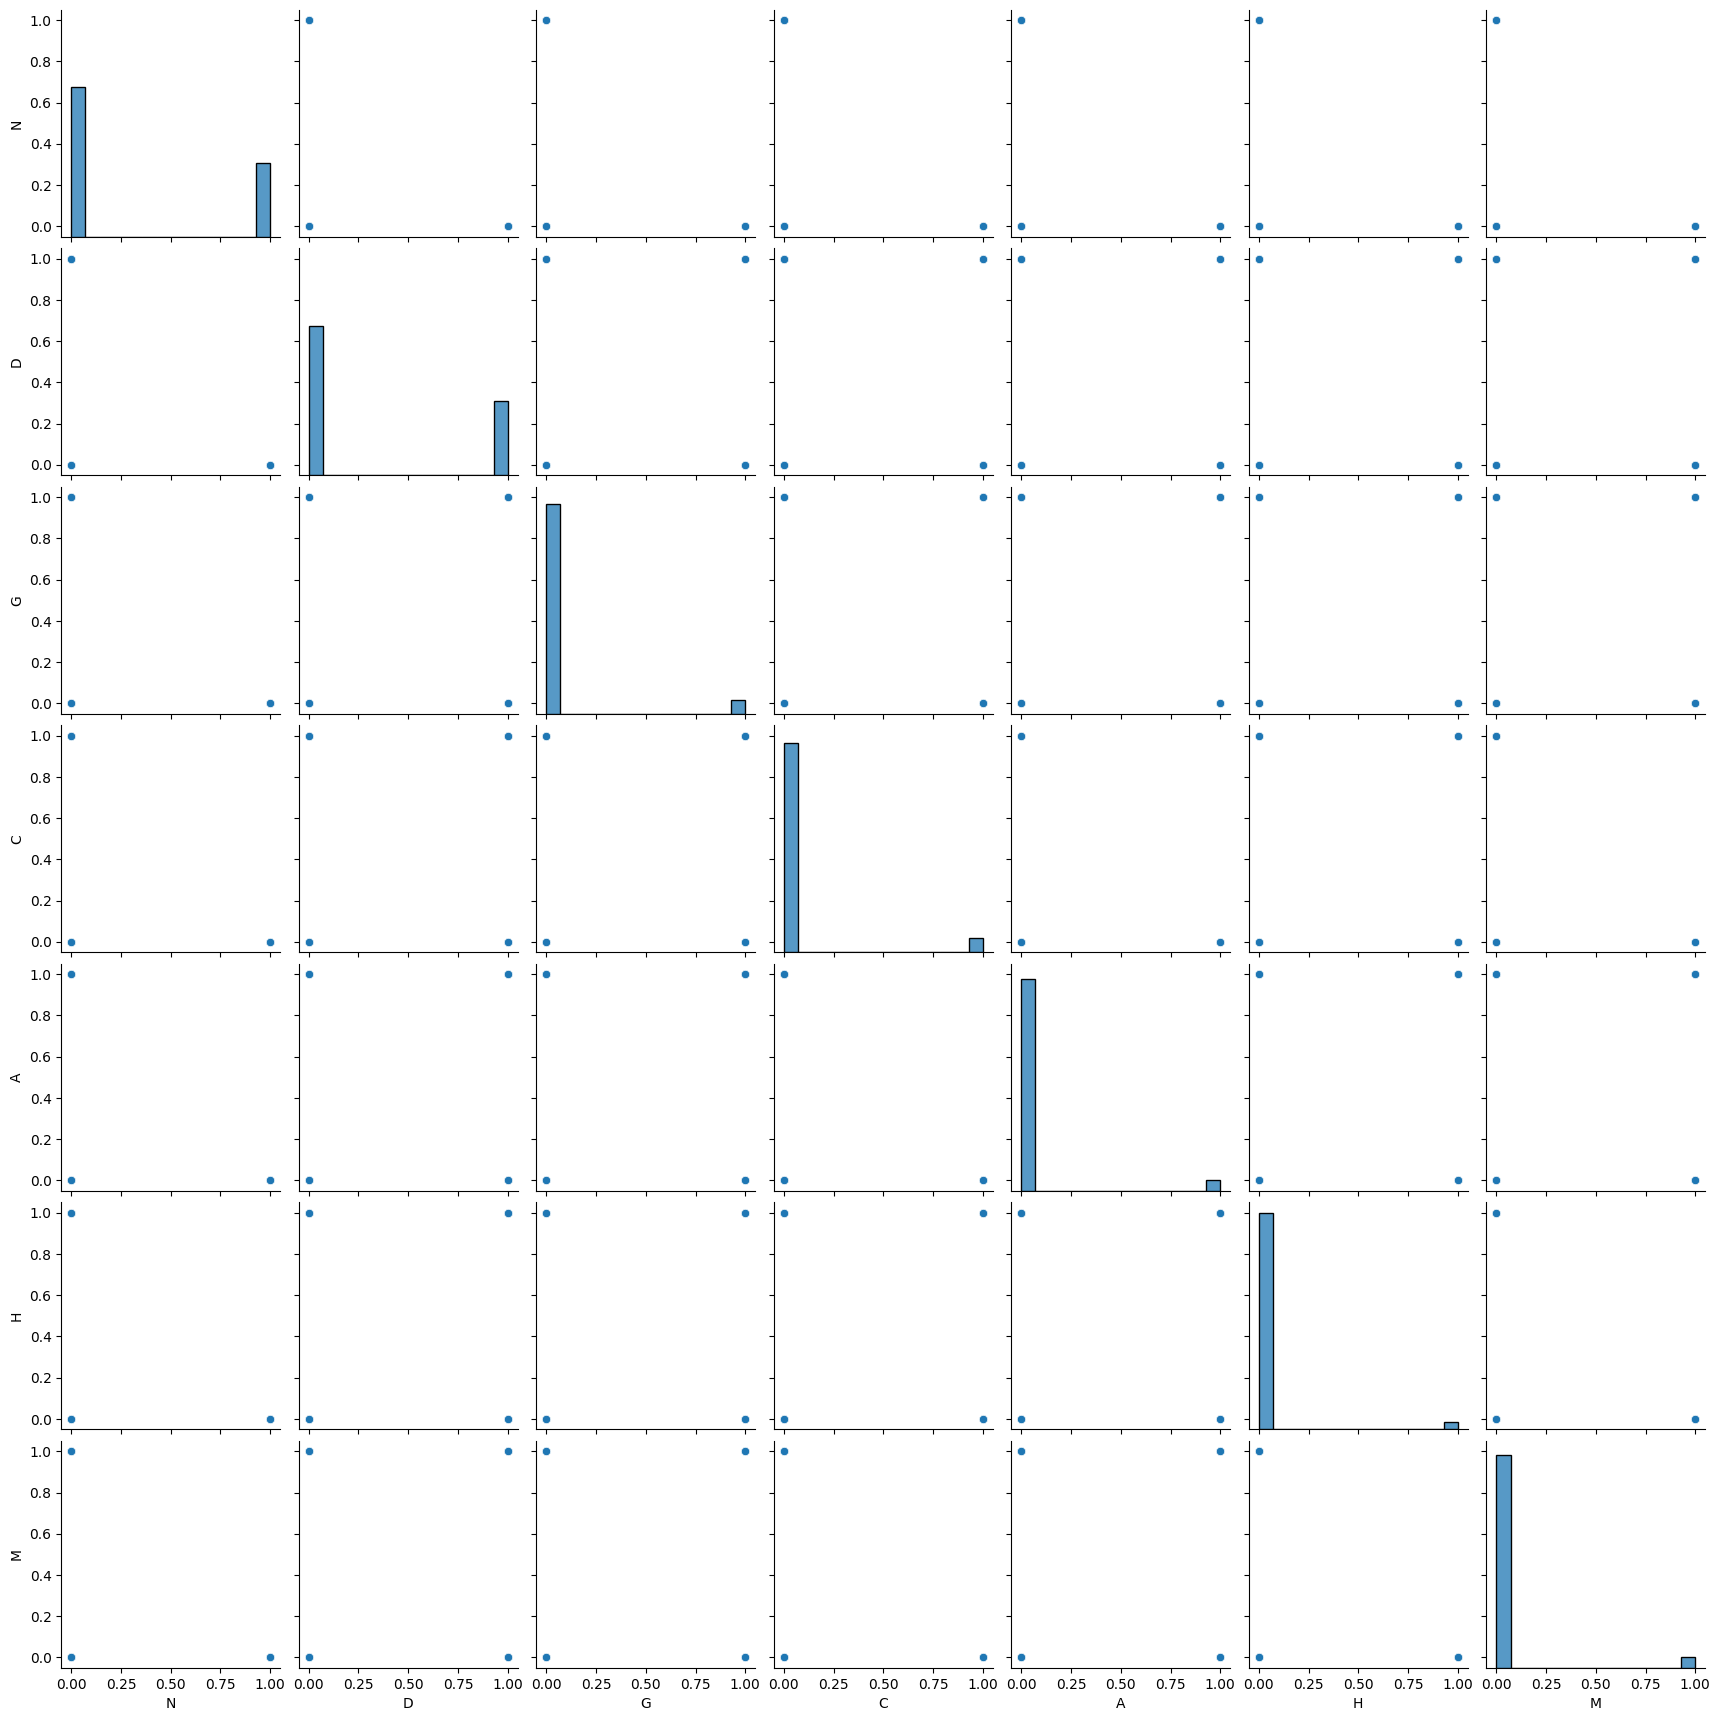

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(ocular_disease[['N','D', 'G',
       'C', 'A', 'H', 'M']])
plt.show()

In [ ]:
ocular_disease['Left-Diagnostic Keywords'].value_counts()

,count
Left-Diagnostic Keywords,
normal fundus,2796
moderate non proliferative retinopathy,717
mild nonproliferative retinopathy,428
cataract,268
pathological myopia,208
...,...
fundus laser photocoagulation spots,1
retinal pigment epithelium atrophy，diabetic retinopathy,1
white vessel，suspected glaucoma,1


In [ ]:
ocular_disease['Left-Diagnostic Keywords'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6392 entries, 0 to 6391
Series name: Left-Diagnostic Keywords
Non-Null Count  Dtype 
--------------  ----- 
6392 non-null   object
dtypes: object(1)
memory usage: 50.1+ KB


In [ ]:
ocular_disease['Left-Diagnostic Keywords'].describe()

,Left-Diagnostic Keywords
count,6392
unique,196
top,normal fundus
freq,2796


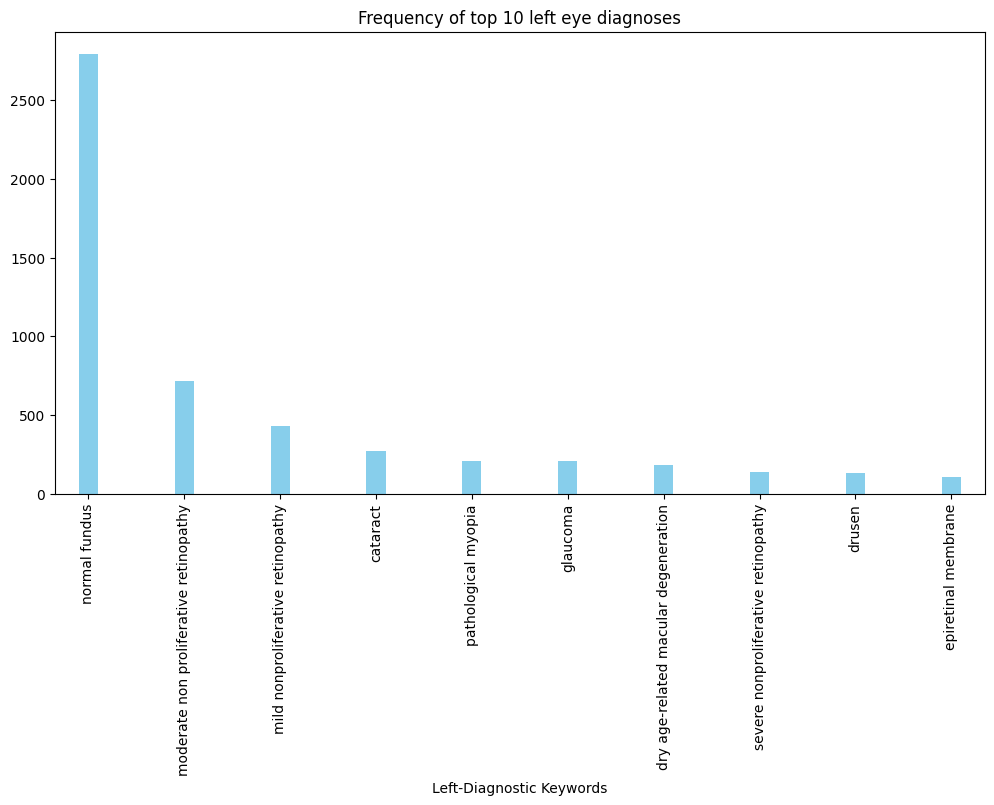

In [ ]:
plt.figure(figsize=(12,6))
ocular_disease['Left-Diagnostic Keywords'].value_counts().head(10).plot(kind='bar',color='skyblue',width=0.2)
plt.title('Frequency of top 10 left eye diagnoses')
plt.show()

In [ ]:
ocular_disease['Right-Diagnostic Keywords'].value_counts()

,count
Right-Diagnostic Keywords,
normal fundus,2705
moderate non proliferative retinopathy,745
mild nonproliferative retinopathy,472
cataract,250
pathological myopia,216
...,...
retinochoroidal coloboma，epiretinal membrane,1
vitreous degeneration，lens dust,1
retinal pigment epithelial hypertrophy，moderate non proliferative retinopathy,1


In [ ]:
ocular_disease['Right-Diagnostic Keywords'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6392 entries, 0 to 6391
Series name: Right-Diagnostic Keywords
Non-Null Count  Dtype 
--------------  ----- 
6392 non-null   object
dtypes: object(1)
memory usage: 50.1+ KB


In [ ]:
ocular_disease['Right-Diagnostic Keywords'].describe()

,Right-Diagnostic Keywords
count,6392
unique,205
top,normal fundus
freq,2705


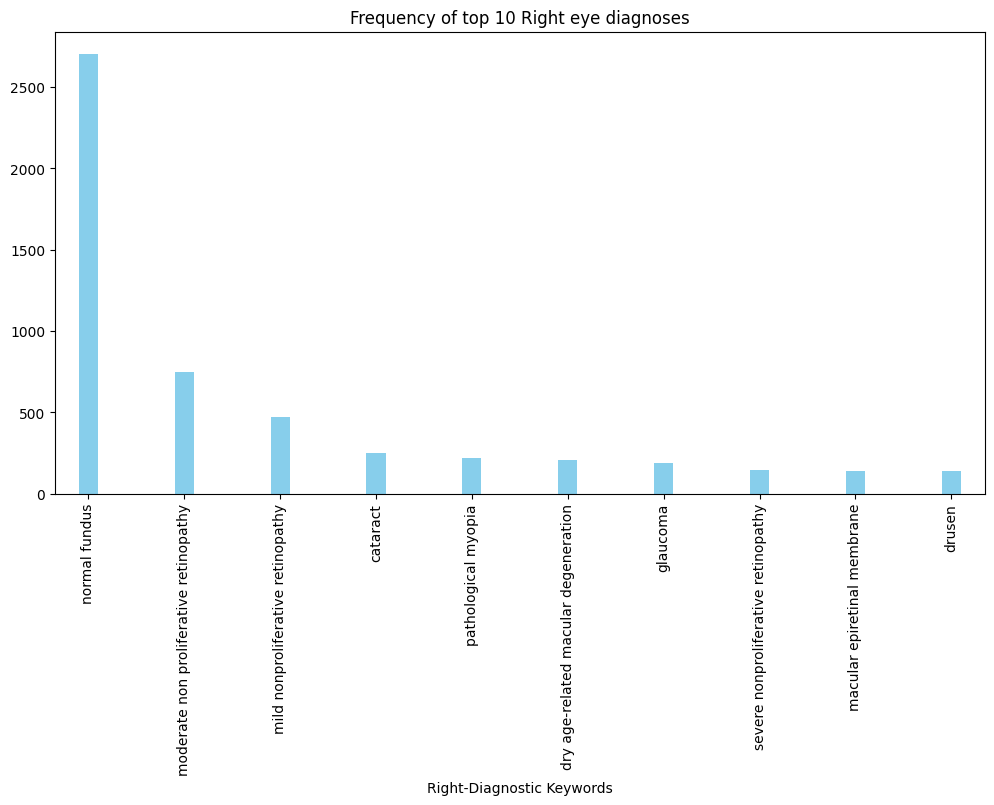

In [ ]:
plt.figure(figsize=(12,6))
ocular_disease['Right-Diagnostic Keywords'].value_counts().head(10).plot(kind='bar',color='skyblue',width=0.2)
plt.title('Frequency of top 10 Right eye diagnoses')
plt.show()

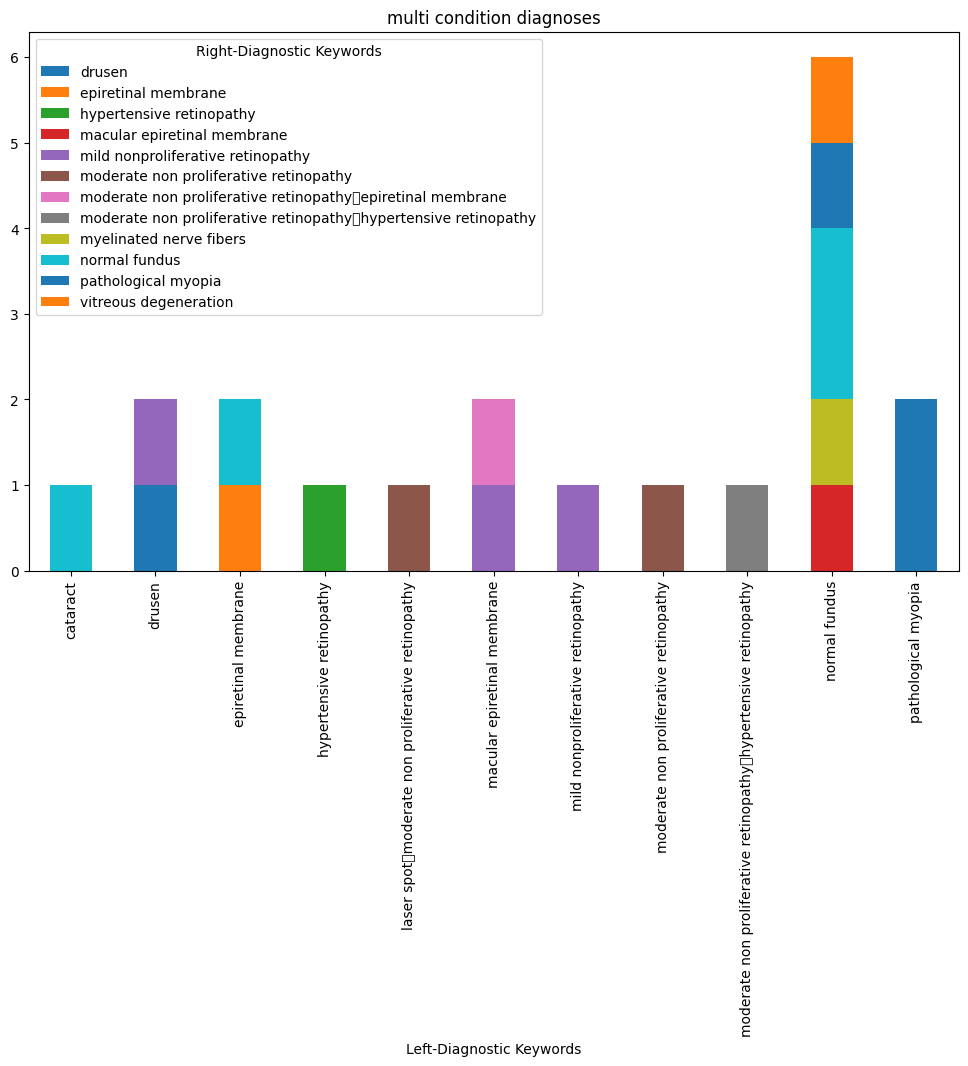

In [ ]:
# scatter plot for multi condition diagnoses
left_rirgt_diagnoses = pd.crosstab(ocular_disease['Left-Diagnostic Keywords'].head(20) , ocular_disease['Right-Diagnostic Keywords'].head(20))
left_rirgt_diagnoses.plot(kind='bar' , stacked=True , figsize=(12,7))
plt.title('multi condition diagnoses')
plt.show()


# 5. Data preraration & Model Selection & prediction & Model evaluation

In [ ]:
# factors that influence the occurrence of ocular diseases
x = ocular_disease[['Patient Age','N','D', 'G','C', 'A', 'H', 'M']]

y = ocular_disease['target']

In [ ]:
# import important libraries for model training
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test=train_test_split(x,y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000 )
model.fit(X_train , Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.predict([[1,2,3,4,5,6,7,8]])

array(['[0, 0, 0, 0, 0, 1, 0, 0]'], dtype=object)